In [10]:
 #For data wrangling
import pandas as pd
import numpy as np

#For ease of use for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OrdinalEncoder

# For EDA
import matplotlib.pyplot as plt
import seaborn as sns


 ## Data Preprocessing Phase

In [11]:
The_Data=pd.read_csv("UGR_Dataset.csv") #load dataset into a dataframe
The_Data.isnull().sum() #check for missing values

Time             0
Protcol          0
Flag             0
Family           0
Clusters         0
SeddAddress      0
ExpAddress       0
BTC              0
USD              0
Netflow_Bytes    0
IPaddress        0
Threats          0
Port             0
Prediction       0
dtype: int64

In [12]:
''' There is no missing data in the dataset, lets check for duplicates and drop them if present '''
Extras=The_Data.duplicated()
print(Extras)

0         False
1         False
2         False
3         False
4         False
          ...  
149038    False
149039    False
149040    False
149041    False
149042    False
Length: 149043, dtype: bool


In [13]:
''' There are no duplicates in the dataset, lets check the different datatypes and number of classes for each feature/target. The number of classes for each feature will help us determine the type of feature encoding we should use '''
The_Data.dtypes

Time              int64
Protcol          object
Flag             object
Family           object
Clusters          int64
SeddAddress      object
ExpAddress       object
BTC               int64
USD               int64
Netflow_Bytes     int64
IPaddress        object
Threats          object
Port              int64
Prediction       object
dtype: object

In [14]:
''' After testing frequency encoding, label encoding and ordinal encoding , it seems labal encoding provides the best results for this experiment'''
#The_Data.drop(['Prediction'],axis=1) # Target won't be encoded

encoder = LabelEncoder()
for column in The_Data.select_dtypes(include=['object']).columns:
    The_Data[column] = encoder.fit_transform(The_Data[column])
    

### Data after encoding

In [15]:
The_Data

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,1,0,16,1,2,2,1,500,5,0,1,5061,2
1,40,1,0,16,1,2,2,1,504,8,0,1,5061,2
2,30,1,0,16,1,2,2,1,508,7,0,1,5061,2
3,20,1,0,16,1,2,2,1,512,15,0,1,5061,2
4,57,1,0,16,1,2,2,1,516,9,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,2,2,15,3,1,6,1010,1590,3340,0,6,5062,0
149039,33,2,2,15,3,1,6,1014,1596,3351,0,6,5062,0
149040,33,2,2,15,3,1,6,1018,1602,3362,0,6,5062,0
149041,33,2,2,15,3,1,6,1022,1608,3373,0,6,5062,0


## Feature Scaling

In [16]:
y=The_Data['Prediction'] #set up the target for the dataset
X=The_Data.drop(['Prediction'],axis=1) # set up features
scaler = preprocessing.StandardScaler()
Scaled_Data = scaler.fit_transform(X)
X=pd.DataFrame(X)
X=pd.concat([The_Data,y],axis=1)

# EDA Phase

## Feature Correlation

### Correlation Heatmap

<Axes: >

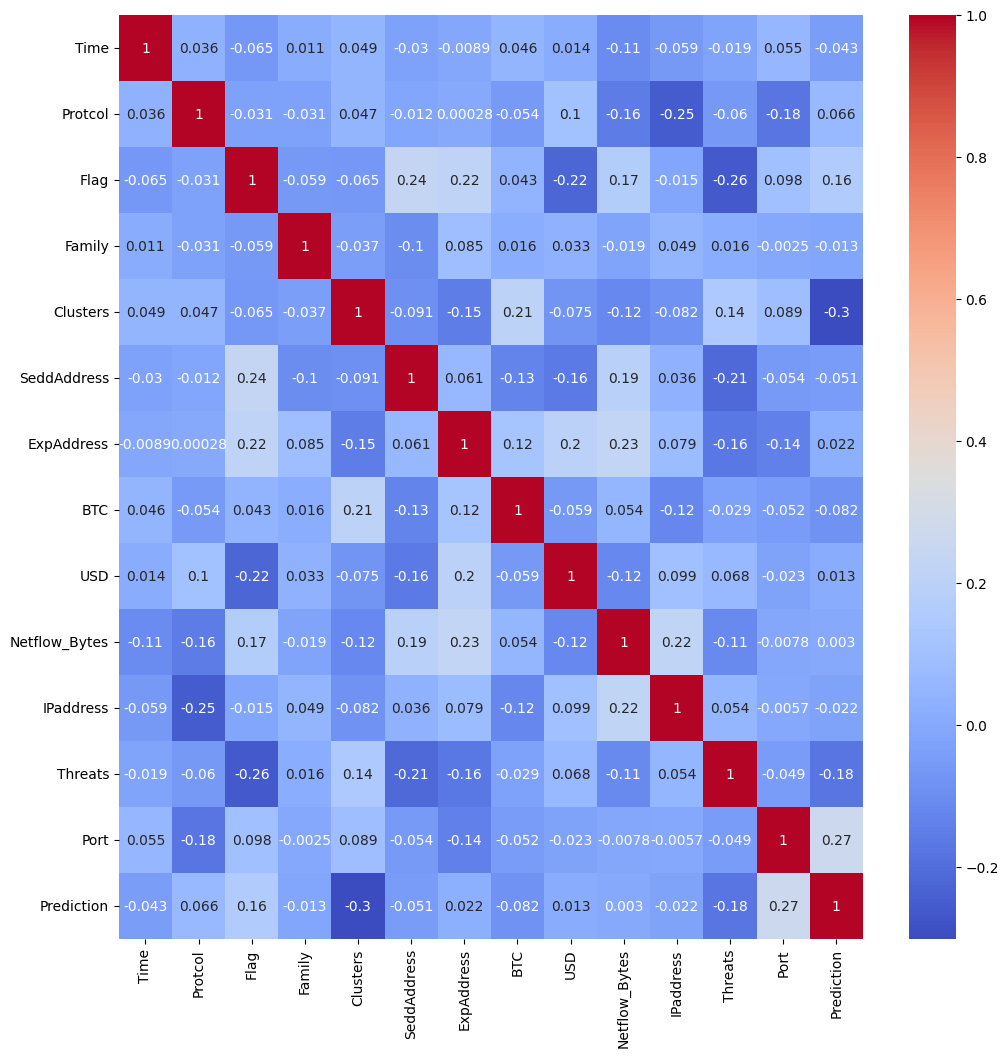

In [17]:
plt.figure(figsize=(12, 12))
sns.heatmap(The_Data.corr(), annot=True, cmap='coolwarm')

Based on the correlation matrix, no feature has a strong correlation with each other nor the target variable, this could possibly present an issue when training each model on the dataset as no feature currently has enough importance to help the model accurately predict the target. Based on this , feature enginnering might be required to improve predictive power.

# Training and Testing Phase

### Random Forest Classifer

The Random Forest algorithm is a machine learning algorithm that can be used for both classification and regression problems. It builds multiple decision trees, each using a randomly selected subset of features and training data samples. The results of these trees are then combined using a technique called bagging (Bootstrap Aggregating). For regression problems, predictions are averaged across the trees. For classification problems, predictions are determined by majority voting. The randomness introduced in feature selection and training data sampling, along with the ensemble nature of the algorithm, helps reduce overfitting and improves generalization.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, shuffle=True)
RT_Model = RFC(n_estimators = 1000)
RT_Model.fit(X_train, y_train)
y_pred=RT_Model.predict(X_test)

# metrics for measuring how well the model fit the data
accuracy_RFC = accuracy_score(y_test, y_pred)
precision_RFC = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall_RFC = recall_score(y_test, y_pred, average='weighted')
f1_RFC = f1_score(y_test, y_pred, average='weighted')


### Support Vector Machine

The Support Vector Machine (SVM) algorithm attempts to find the hyperplane that provides the greatest margin of separation between classes in the target variable. The margin is the distance between the hyperplane and the nearest data points of each class, which are called support vectors. A larger margin typically leads to better generalization. SVMs are particularly effective in high-dimensional spaces and are robust to overfitting when the number of features is greater than the number of samples. However, they can struggle with large datasets and may require careful tuning of parameters like the kernel type and regularization.

In [19]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm=svm_model.predict(X_test)

# metrics for measuring how well the model fit the data
accuracy_SVM = accuracy_score(y_test, y_pred_svm)
precision_SVM = precision_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' for multi-class
recall_SVM = recall_score(y_test, y_pred_svm, average='weighted')
f1_SVM = f1_score(y_test, y_pred_svm, average='weighted')

### Guassian Naive Bayes

The Naïve Bayes algorithm is based on Bayes' Theorem, which calculates posterior probabilities using prior probabilities and likelihoods. The "naïve" assumption is that all features are conditionally independent given the target class, which simplifies the computation of probabilities. This algorithm works well for small to medium-sized datasets and is particularly effective for problems like text classification. However, as datasets grow larger and feature dependencies become significant, the assumptions of independence may reduce accuracy.

In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_GNB = gnb.predict(X_test)

# metrics for measuring how well the model fit the data
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
precision_GNB = precision_score(y_test, y_pred_GNB, average='weighted')  # Use 'weighted' for multi-class
recall_GNB = recall_score(y_test, y_pred_GNB, average='weighted')
f1_GNB = f1_score(y_test, y_pred_GNB, average='weighted')

## Comparison of Evaluation Metrics for each Model

The metrics for measuring the performance of the algorithms of this experiment are the following: Accuracy, Precision, Recall and the F1-Score.

Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of the total predictions. While it gives a sense of overall correctness, it may not be suitable for imbalanced datasets, where one class dominates.

Precision measures the proportion of correctly identified positive predictions out of all positive predictions made by the model. It focuses on the accuracy of the positive class predictions and is critical in situations where false positives are costly.

Recall measures the proportion of actual positive cases correctly identified by the model. It reflects the model's ability to capture all relevant instances and is especially important when false negatives have serious consequences.

The F1-score balances the trade-off between precision and recall by calculating their harmonic mean. It is particularly useful when the dataset is imbalanced, as it combines the two metrics into a single score that accounts for both false positives and false negatives.

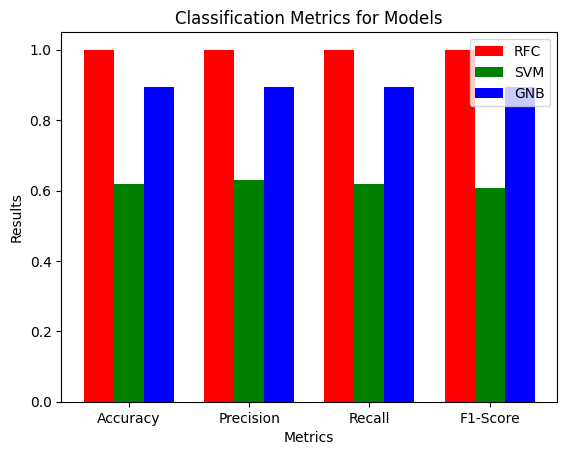

In [23]:
X_axis = ['Accuracy','Precision','Recall','F1']

N = 4
ind = np.arange(N)  
width = 0.25
  
RFC_values = [accuracy_RFC, precision_RFC, recall_RFC, f1_RFC] 
SVM_values = [accuracy_SVM, precision_SVM, recall_SVM, f1_SVM] 
GNB_values = [accuracy_GNB, precision_GNB, recall_GNB, f1_GNB] 

bar1 = plt.bar(ind, RFC_values, width, color = 'red', label='RFC') 
bar2 = plt.bar(ind+width, SVM_values, width, color='green',label='SVM') 
bar3 = plt.bar(ind+width*2, GNB_values, width, color = 'blue',label='GNB') 


  
plt.xticks(ind+width,['Accuracy', 'Precision', 'Recall', 'F1-Score']) 
plt.xlabel("Metrics") 
plt.ylabel("Results") 
plt.title("Classification Metrics for Models") 
plt.legend() 
plt.show() 

# Results

Based on the bar graph, the model that learned the dataset the best is the Random Forest algorithm with the SVM having the worst results. This makes sense given that Random Forests models typically do better with large and complex datasets , while the SVM model learns better with smaller datasets. In this instance, even though the dataset is relatively large, it did not drastically reduce the metrics for the  Guassian Naive Bayes model.